<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/Innomatics_Hackathon_ASuresh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **1) Import Required Libraries**

In [2]:
# Read Data
import numpy as np                     
import pandas as pd                    

# Visualization
import seaborn as sns                  
import matplotlib.pyplot as plt        
%matplotlib inline

# style
plt.style.use("fivethirtyeight")       
sns.set_style("darkgrid")              

import warnings                        
warnings.filterwarnings("ignore")

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### **2) Read data**

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Innomatics_Hackathon.zip")
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [5]:
# last five rows
df.tail()

,x1,x2,y
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0
2226,109.624009,1.000000e+08,0


In [6]:
# size of the dataset
df.shape

(2227, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


- we have **independant features** of **float type** and **target** as **integer type**

In [8]:
# Descriptive statistics

df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [9]:
df_original = df.copy()

### **3) EDA (Exploratory Data Analysis)**

#### **3.1) Target Variable**

In [10]:
df['y'].value_counts()

0    1242
1     985
Name: y, dtype: int64

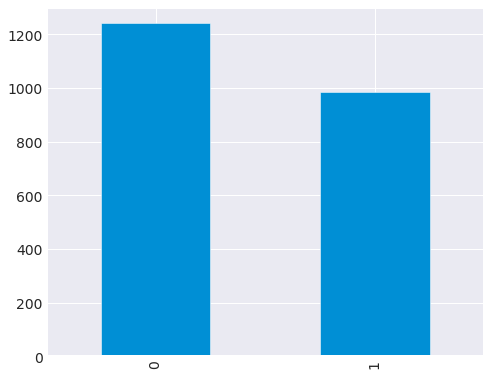

In [11]:
plt.figure(figsize=(7,6))
df['y'].value_counts().plot(kind='bar');

#### **3.2) Data Visualization**

#### **Univariate Analysis**

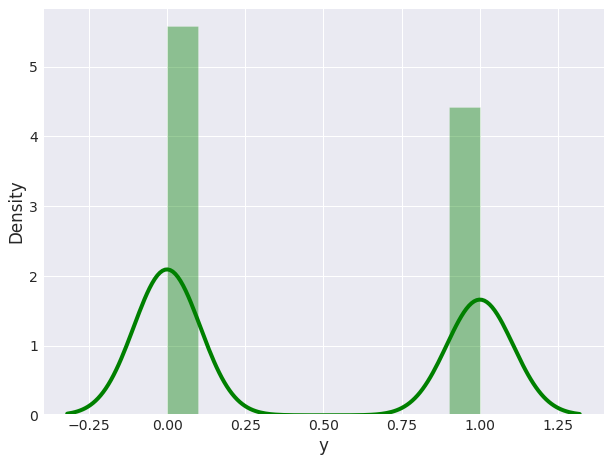

In [12]:
plt.figure(figsize=(9,7))
sns.distplot(df['y'], color='g', bins=10, hist_kws={'alpha':0.4});

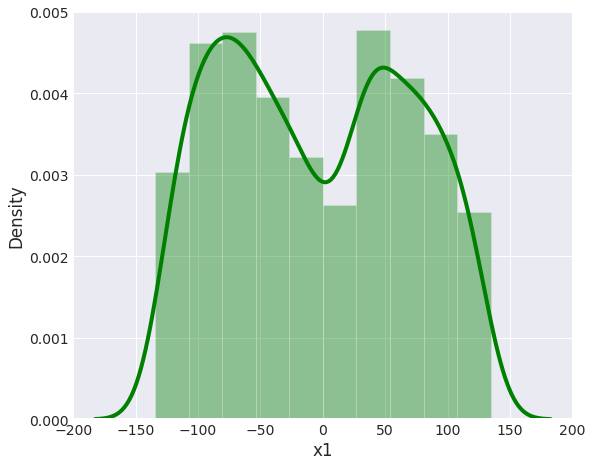

In [13]:
plt.figure(figsize=(8,7))
sns.distplot(df['x1'], color='g', bins=10, hist_kws={'alpha':0.4});

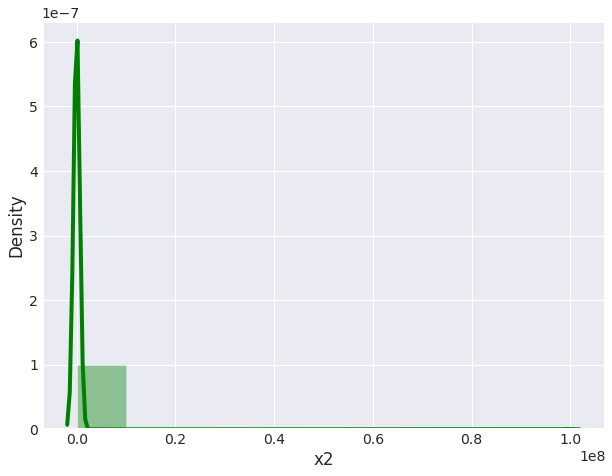

In [14]:
plt.figure(figsize=(9,7))
sns.distplot(df['x2'], color='g', bins=10, hist_kws={'alpha':0.4});

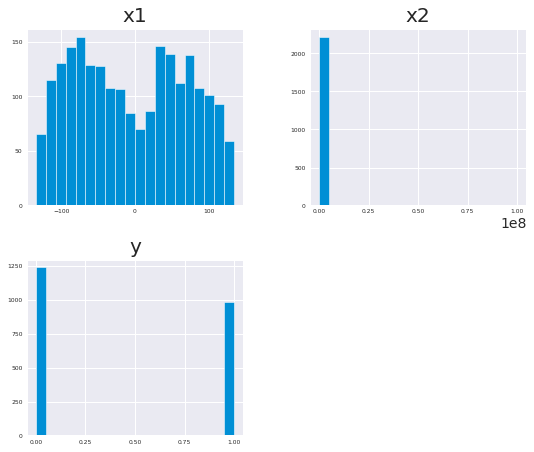

In [15]:
df.hist(figsize=(8,7), bins=20, xlabelsize=6, ylabelsize=6);

#### **bivariate analysis**

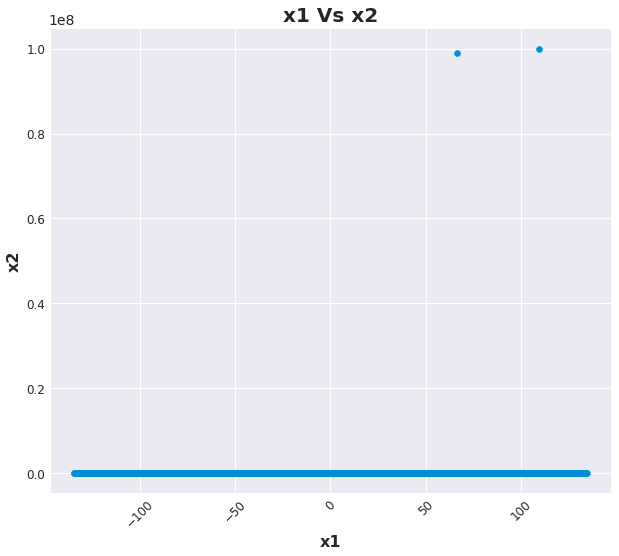

In [16]:
# Scatter plot between "x1" & "x2"
plt.figure(figsize=(9,8))

plt.scatter(df['x1'], df['x2'])

plt.xlabel('x1', fontsize=16, fontweight='bold')
plt.ylabel('x2', fontsize=16, fontweight='bold')

plt.title('x1 Vs x2', fontsize=20, fontweight='bold')

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.show()

#### **Multivariate Analysis**

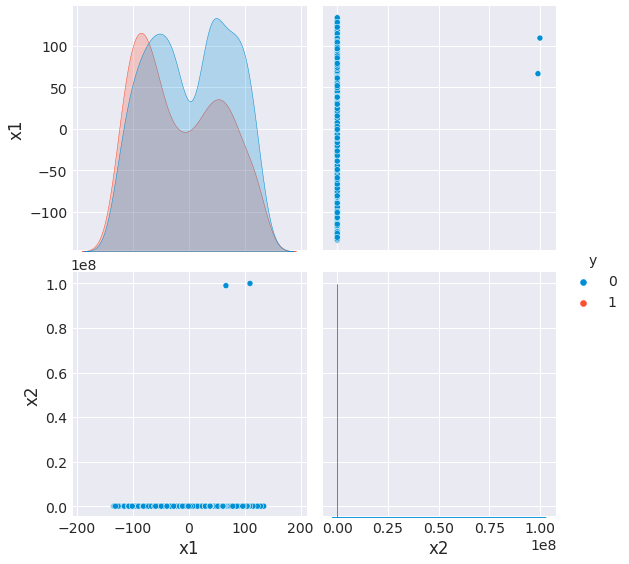

In [17]:
sns.pairplot(df, hue='y', height=4);

### **4) Feature Engineering**

#### **4.1) Missing Values**

In [18]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

- Missing values in x1 & x2

In [19]:
# Listing Number of missing values by feature column wise
total = df.isnull().sum().sort_values(ascending=False)
total = total[total > 0]
total

x1    5
x2    3
dtype: int64

In [20]:
percentage = round(total/len(df)*100, 2)[round(total/len(df)*100, 2) != 0]
pd.concat([total, percentage], axis=1, keys=['Total','Percentage'])

,Total,Percentage
x1,5,0.22
x2,3,0.13


In [21]:
# Filling missing values with median

df['x1'] = df['x1'].fillna(df['x1'].median())
df['x2'] = df['x2'].fillna(df['x2'].median())

In [22]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [23]:
df[df == 0].sum()

x1    0.0
x2    0.0
y     0.0
dtype: float64

#### **4.2) Duplicate rows**

In [24]:
df.duplicated().value_counts()

False    2211
True       16
dtype: int64

In [25]:
df[df.duplicated()]

,x1,x2,y
4,-119.366669,115.0,1
477,-118.366669,107.0,1
484,-118.366669,107.0,1
490,-118.366669,132.0,1
707,129.633331,-122.0,1
775,-50.366669,46.0,1
981,85.633331,-126.0,1
1356,34.633331,17.0,0
1380,30.633331,9.0,0
1479,-117.366669,-124.0,0


In [26]:
# Remove all duplicates
df.drop_duplicates(inplace=True)
print("Dataset size before removing duplicates:", df_original.shape)
print("Dataset size after removing duplicates:", df.shape)

Dataset size before removing duplicates: (2227, 3)
Dataset size after removing duplicates: (2211, 3)


#### **4.3) Correlation b/n features**

In [27]:
df.corr()[['y']].T.style.background_gradient('copper_r')

,x1,x2,y
y,-0.119839,-0.026796,1.000000


Text(0.5, 1.0, 'Features correlation')

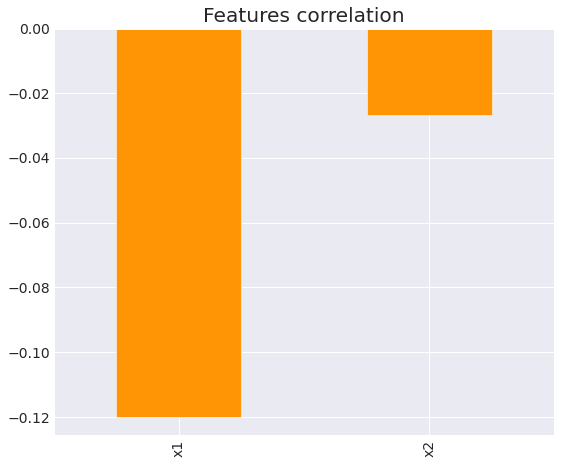

In [28]:
corr_feat = df.corr()
plt.figure(figsize=(8,7))
corr_feat["y"][:-1].plot(kind="bar", grid=True, color='#FF9505')
plt.title("Features correlation")

- both independant features have -ve correlation with target.

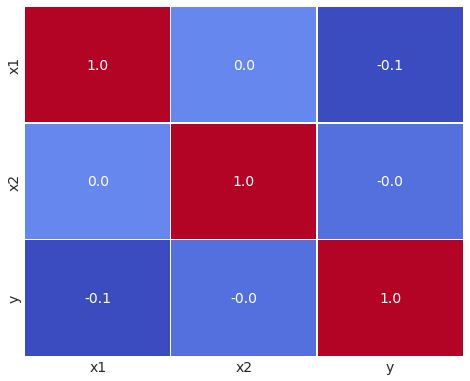

In [29]:
# Pearson Correlation
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

#### **4.4) Outliers**

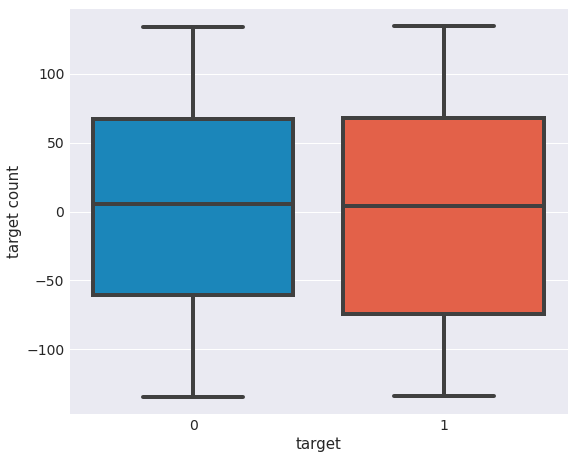

In [30]:
plt.figure(figsize=(8,7))
sns.boxplot(data=df, x='y', y=df['x1'][df['y']==0])
sns.boxplot(data=df, x='y', y=df['x2'][df['y']==1])
plt.xlabel("target", size=15)
plt.ylabel("target count", size=15)
plt.show()

#### **4.5) Scaling**

In [31]:
# Independant variable
X = df.drop('y', axis=1)

# Dependant variable
y = df['y']        

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)

In [33]:
# shape of X & Y test / train
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1768, 2) (443, 2) (1768,) (443,)


In [34]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

### **5) Model building and Evaluation**

#### **5.1) Logistic Regression**

In [61]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
y_pred_log = LogReg.predict(X_test)

In [63]:
print("Train Score {:.2f} & Test Score {:.2f}".format(LogReg.score(X_train, y_train), LogReg.score(X_test, y_test)))

Train Score 0.59 & Test Score 0.58


In [64]:
print("Logistic Regression : Train Score {:.2f} & Test Score {:.2f}".format(LogReg.score(X_train, y_train), LogReg.score(X_test, y_test)))
print('-'*70)
print("\n\nConfusion matrix \n\n", confusion_matrix(y_test, y_pred_log))
print('-'*70)
print("\n\nClassification Report\n\n",classification_report(y_test, y_pred_log))

Logistic Regression : Train Score 0.59 & Test Score 0.58
----------------------------------------------------------------------


Confusion matrix 

 [[194  49]
 [139  61]]
----------------------------------------------------------------------


Classification Report

               precision    recall  f1-score   support

           0       0.58      0.80      0.67       243
           1       0.55      0.30      0.39       200

    accuracy                           0.58       443
   macro avg       0.57      0.55      0.53       443
weighted avg       0.57      0.58      0.55       443



#### **Hyperparameter tuning**

In [65]:
# hyperparameter tuning of logistic regression

param = {
         'penalty':['l1','l2'],
         'C':[0.001, 0.01, 0.1, 1, 10, 20,100, 1000]
}

In [67]:
log_reg1 = LogisticRegression(penalty='l1')

cv = GridSearchCV(log_reg1, param, cv=5, n_jobs=-1)
cv.fit(X_train,y_train)
cv.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [68]:
# best_parameters
print("Best CV params:", cv.best_params_)

# best_score
print("\n\nBest CV score:", cv.best_score_)

Best CV params: {'C': 0.1, 'penalty': 'l2'}


Best CV score: 0.5876730526079929


In [69]:
# best_estimators
best_lr = cv.best_estimator_
best_lr

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
log_reg3 = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                              intercept_scaling=1, l1_ratio=None, max_iter=100,
                              multi_class='auto', n_jobs=None, penalty='l2',
                              random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                              warm_start=False)
log_reg3.fit(X_train,y_train) 

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
print("Logistic Regression : Train Score {:.2f} & Test Score {:.2f}".format(log_reg3.score(X_train, y_train), log_reg3.score(X_test, y_test)))

Logistic Regression : Train Score 0.58 & Test Score 0.58


In [73]:
y_pred_Log = log_reg3.predict_proba(X_test)
y_pred_Log_test = log_reg3.predict(X_test)

lr_acc = accuracy_score(y_test, y_pred_Log_test)
lr_acc

0.5756207674943566

In [116]:
LogReg_linear_acc = accuracy_score(y_test, y_pred_Log_test)

#### **5.2) SVM**

#### **kernal=linear**

In [41]:
SVM_linear = svm.SVC(kernel="linear")    
SVM_linear.fit(X_train, y_train)    

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [113]:
y_pred_SVM_linear = SVM_linear.predict(X_test)
SVM_linear_acc = accuracy_score(y_test, y_pred_SVM_linear)

In [43]:
print("Train Score {:.2f} & Test Score {:.2f}".format(SVM_linear.score(X_train, y_train), SVM_linear.score(X_test, y_test)))

Train Score 0.56 & Test Score 0.55


In [88]:
print("SVM Linear : Train Score {:.2f} & Test Score {:.2f}".format(SVM_linear.score(X_train, y_train), SVM_linear.score(X_test, y_test)))
print('-'*70)
print("\n\nConfusion matrix \n\n", confusion_matrix(y_test, y_pred_SVM_linear))
print('-'*70)
print("\n\nClassification Report\n\n", classification_report(y_test, y_pred_SVM_linear))

SVM Linear : Train Score 0.56 & Test Score 0.55
----------------------------------------------------------------------


Confusion matrix 

 [[243   0]
 [200   0]]
----------------------------------------------------------------------


Classification Report

               precision    recall  f1-score   support

           0       0.55      1.00      0.71       243
           1       0.00      0.00      0.00       200

    accuracy                           0.55       443
   macro avg       0.27      0.50      0.35       443
weighted avg       0.30      0.55      0.39       443



#### **kernal=RBF**

In [45]:
SVM_RBF = svm.SVC(kernel='rbf')    
SVM_RBF.fit(X_train, y_train)    

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [111]:
y_pred_SVM_RBF = SVM_RBF.predict(X_test)
SVM_RBF_acc = accuracy_score(y_test, y_pred_SVM_RBF)

In [47]:
print("Train Score {:.2f} & Test Score {:.2f}".format(SVM_RBF.score(X_train, y_train), SVM_RBF.score(X_test, y_test)))

Train Score 0.58 & Test Score 0.58


In [89]:
print("SVM RBF : Train Score {:.2f} & Test Score {:.2f}".format(SVM_RBF.score(X_train, y_train), SVM_RBF.score(X_test, y_test)))
print('-'*70)
print("\n\nConfusion matrix \n\n", confusion_matrix(y_test, y_pred_SVM_RBF))
print('-'*70)
print("\n\nClassification Report\n\n", classification_report(y_test, y_pred_SVM_RBF))

SVM RBF : Train Score 0.58 & Test Score 0.58
----------------------------------------------------------------------


Confusion matrix 

 [[191  52]
 [136  64]]
----------------------------------------------------------------------


Classification Report

               precision    recall  f1-score   support

           0       0.58      0.79      0.67       243
           1       0.55      0.32      0.41       200

    accuracy                           0.58       443
   macro avg       0.57      0.55      0.54       443
weighted avg       0.57      0.58      0.55       443



#### **5.4) Decision Tree**

In [104]:
DTR = DecisionTreeClassifier()
DTR.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [112]:
y_pred_DTR = DTR.predict(X_test)
DTR_acc = accuracy_score(y_test, y_pred_DTR)

In [106]:
print("Train Score {:.2f} & Test Score {:.2f}".format(DTR.score(X_train, y_train), DTR.score(X_test, y_test)))

Train Score 1.00 & Test Score 0.47


In [107]:
print("SVM RBF : Train Score {:.2f} & Test Score {:.2f}".format(DTR.score(X_train, y_train), DTR.score(X_test, y_test)))
print('-'*70)
print("\n\nConfusion matrix \n\n", confusion_matrix(y_test, y_pred_DTR))
print('-'*70)
print("\n\nClassification Report\n\n", classification_report(y_test, y_pred_DTR))

SVM RBF : Train Score 1.00 & Test Score 0.47
----------------------------------------------------------------------


Confusion matrix 

 [[119 124]
 [110  90]]
----------------------------------------------------------------------


Classification Report

               precision    recall  f1-score   support

           0       0.52      0.49      0.50       243
           1       0.42      0.45      0.43       200

    accuracy                           0.47       443
   macro avg       0.47      0.47      0.47       443
weighted avg       0.47      0.47      0.47       443



#### **5.5) KNN**

In [80]:
k_range = range(1, 41)
k_scores = []

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    preds = knn.predict(X_test)
    scores = accuracy_score(y_test, preds)
    k_scores.append(scores)

In [81]:
k_scores 

[0.4785553047404063,
 0.510158013544018,
 0.5282167042889391,
 0.5259593679458239,
 0.5079006772009029,
 0.5282167042889391,
 0.510158013544018,
 0.5327313769751693,
 0.5124153498871332,
 0.5259593679458239,
 0.5191873589164786,
 0.5237020316027088,
 0.49887133182844245,
 0.5214446952595937,
 0.5282167042889391,
 0.5214446952595937,
 0.5349887133182845,
 0.5485327313769752,
 0.5349887133182845,
 0.5598194130925508,
 0.5304740406320542,
 0.5191873589164786,
 0.5372460496613995,
 0.5643340857787811,
 0.54627539503386,
 0.5598194130925508,
 0.5395033860045146,
 0.5620767494356659,
 0.5553047404063205,
 0.5756207674943566,
 0.5553047404063205,
 0.5711060948081265,
 0.5733634311512416,
 0.5778781038374717,
 0.5869074492099323,
 0.5733634311512416,
 0.5778781038374717,
 0.5688487584650113,
 0.5891647855530474,
 0.5733634311512416]

In [87]:
np.array(k_scores).mean()

0.5422121896162528

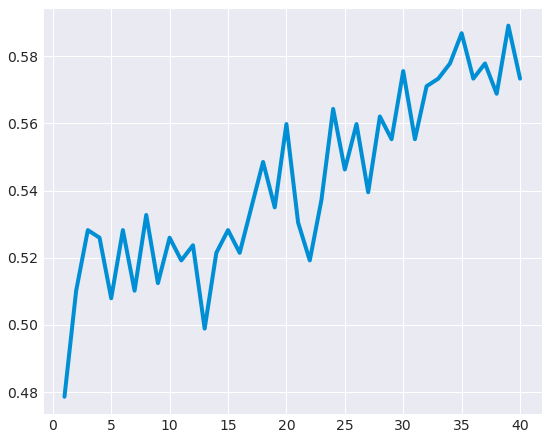

In [84]:
plt.figure(figsize=(8,7))
sns.lineplot(x = k_range, y = k_scores);

In [99]:
KNN = KNeighborsClassifier(n_neighbors=30)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [109]:
y_pred_KNN = KNN.predict(X_test)
KNN_acc = accuracy_score(y_test, y_pred_KNN)

In [101]:
print("Train Score {:.2f} & Test Score {:.2f}".format(KNN.score(X_train, y_train), KNN.score(X_test, y_test)))

Train Score 0.61 & Test Score 0.58


In [102]:
print("KNN : Train Score {:.2f} & Test Score {:.2f}".format(KNN.score(X_train, y_train), KNN.score(X_test, y_test)))
print('-'*70)
print("\n\nConfusion matrix \n\n", confusion_matrix(y_test, y_pred_KNN))
print('-'*70)
print("\n\nClassification Report\n\n", classification_report(y_test, y_pred_KNN))

KNN : Train Score 0.61 & Test Score 0.58
----------------------------------------------------------------------


Confusion matrix 

 [[184  59]
 [129  71]]
----------------------------------------------------------------------


Classification Report

               precision    recall  f1-score   support

           0       0.59      0.76      0.66       243
           1       0.55      0.35      0.43       200

    accuracy                           0.58       443
   macro avg       0.57      0.56      0.55       443
weighted avg       0.57      0.58      0.56       443



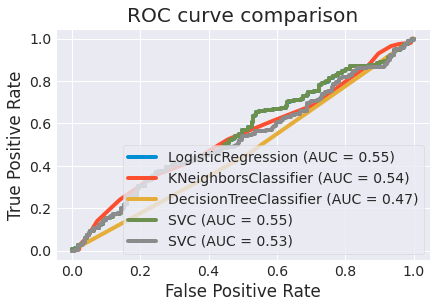

In [108]:
from sklearn.metrics import plot_roc_curve
m1_roc = plot_roc_curve(LogReg, X_test, y_test)
plot_roc_curve(KNN, X_test, y_test, ax = m1_roc.ax_)
plot_roc_curve(DTR, X_test, y_test, ax = m1_roc.ax_)
plot_roc_curve(SVM_linear, X_test, y_test, ax = m1_roc.ax_)
plot_roc_curve(SVM_RBF, X_test, y_test, ax = m1_roc.ax_)

plt.title("ROC curve comparison")
plt.show()

### **Conclusion**

Logistic Regression : 58

SVM Linear : 55

SVM RBF : 58

Decision Tree : 47

KNN : 58

- Logistic Regression / SVM RBF / KNN giving equal score

- AUC curve getting Logistic Regression & SVM : 0.55

In [117]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'SVM Linear', 'SVM RBF', 'Decision Tree Classifier', 'KNN'],
    'Score' : [LogReg_linear_acc, SVM_linear_acc, SVM_RBF_acc, DTR_acc, KNN_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,0.575621
2,SVM RBF,0.575621
4,KNN,0.575621
1,SVM Linear,0.548533
3,Decision Tree Classifier,0.471783
